In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/My Drive/kendaraan_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Kita hapus kolom tertarik karena berdasarkan deskripsi tugas kita akan mengelompokan pelanggan tanpa memperhatikan label kelas tertarik

In [6]:
df = df.drop(columns='Tertarik')

In [7]:
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [8]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['id'])
 
# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak
0,30.0,1.0,33.0,1.0,28029.0,152.0,97.0,0,1,0,1,0,0,1
1,48.0,1.0,39.0,0.0,25800.0,29.0,158.0,1,0,0,0,1,1,0
2,21.0,1.0,46.0,1.0,32733.0,160.0,119.0,0,0,0,1,0,0,1
3,58.0,1.0,48.0,0.0,2630.0,124.0,63.0,0,1,1,0,0,0,1
4,50.0,1.0,35.0,0.0,34857.0,88.0,194.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285826,23.0,1.0,4.0,1.0,25988.0,152.0,217.0,0,1,0,1,0,0,1
285827,21.0,1.0,46.0,1.0,44686.0,152.0,50.0,0,1,0,1,0,0,1
285828,23.0,1.0,50.0,1.0,49751.0,152.0,226.0,0,1,0,1,0,0,1
285829,68.0,1.0,7.0,1.0,30503.0,124.0,270.0,1,0,1,0,0,0,1


kita akan menghilangkan kolom SIM, Sudah_Asuransi, Jenis_Kelamin_Pria, Jenis_Kelamin_Wanita, Umur_Kendaraan_1-2 Tahun, Umur_Kendaraan_< 1 Tahun, Umur_Kendaraan_> 2 Tahun, Kendaraan_Rusak_Pernah, Kendaraan_Rusak_Tidak karena kurang relevan untuk proses clustering


In [9]:
data = data.drop(columns=['SIM','Sudah_Asuransi','Jenis_Kelamin_Pria','Jenis_Kelamin_Wanita','Umur_Kendaraan_1-2 Tahun','Umur_Kendaraan_< 1 Tahun','Umur_Kendaraan_> 2 Tahun','Kendaraan_Rusak_Pernah','Kendaraan_Rusak_Tidak'])

In [10]:
count_nan_in_data = data.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_data))

Count of NaN: 71380


In [11]:
data=data.dropna()

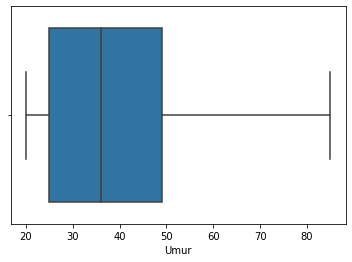

In [12]:
sns.boxplot(x=data['Umur'])

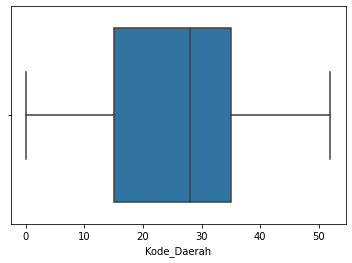

In [13]:
sns.boxplot(x=data['Kode_Daerah'])

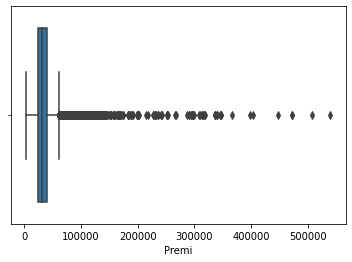

In [14]:
sns.boxplot(x=data['Premi'])

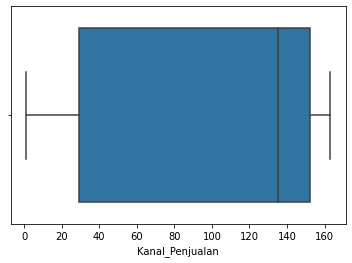

In [15]:
sns.boxplot(x=data['Kanal_Penjualan'])

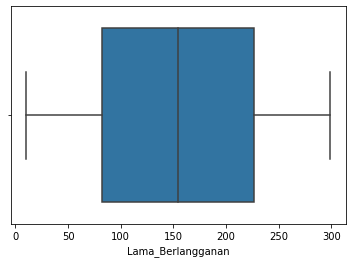

In [16]:
sns.boxplot(x=data['Lama_Berlangganan'])

menghapus data outliers/pencilan

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data.shape

(215198, 5)

In [18]:
data

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0
...,...,...,...,...,...
285826,23.0,4.0,25988.0,152.0,217.0
285827,21.0,46.0,44686.0,152.0,50.0
285828,23.0,50.0,49751.0,152.0,226.0
285829,68.0,7.0,30503.0,124.0,270.0


Histogram untuk melihat sebaran data

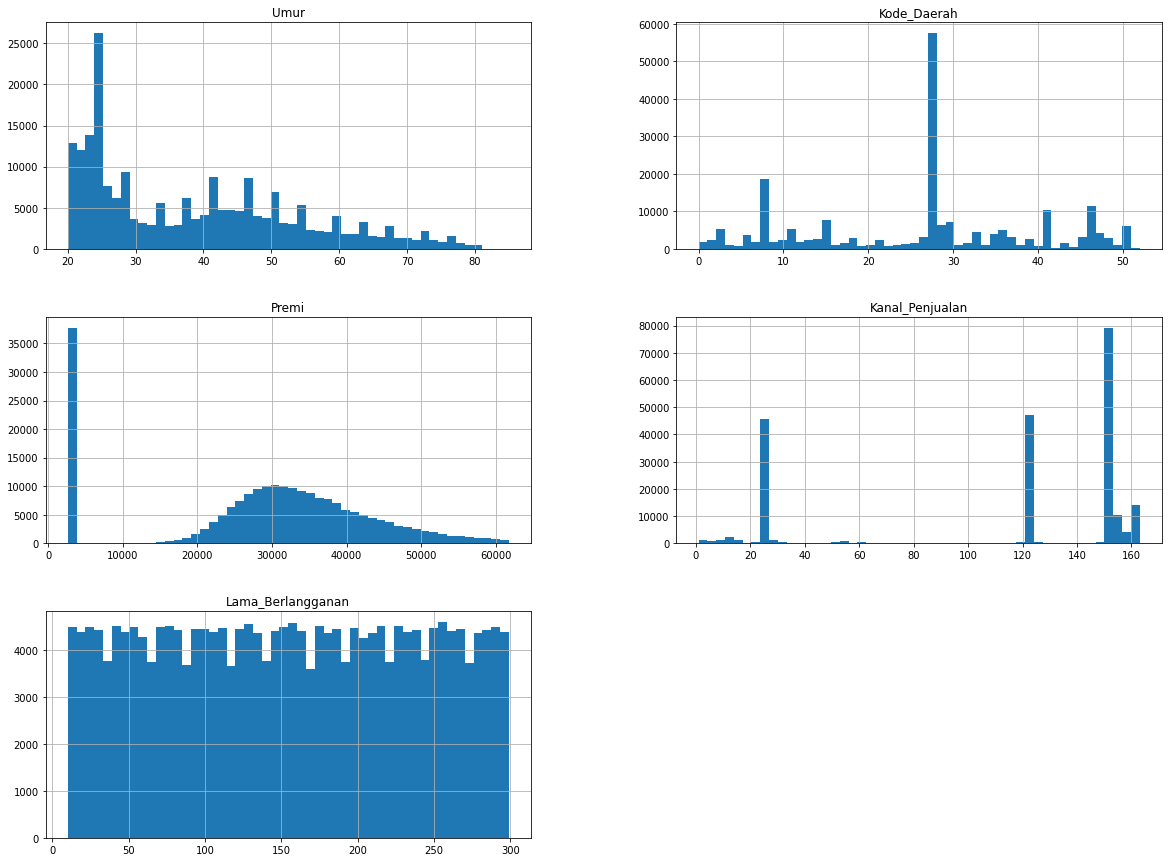

In [19]:
data.hist(bins=50, figsize=(20,15))
plt.show()

mennggunakan pairplot untuk melihat korelasi antar fitur

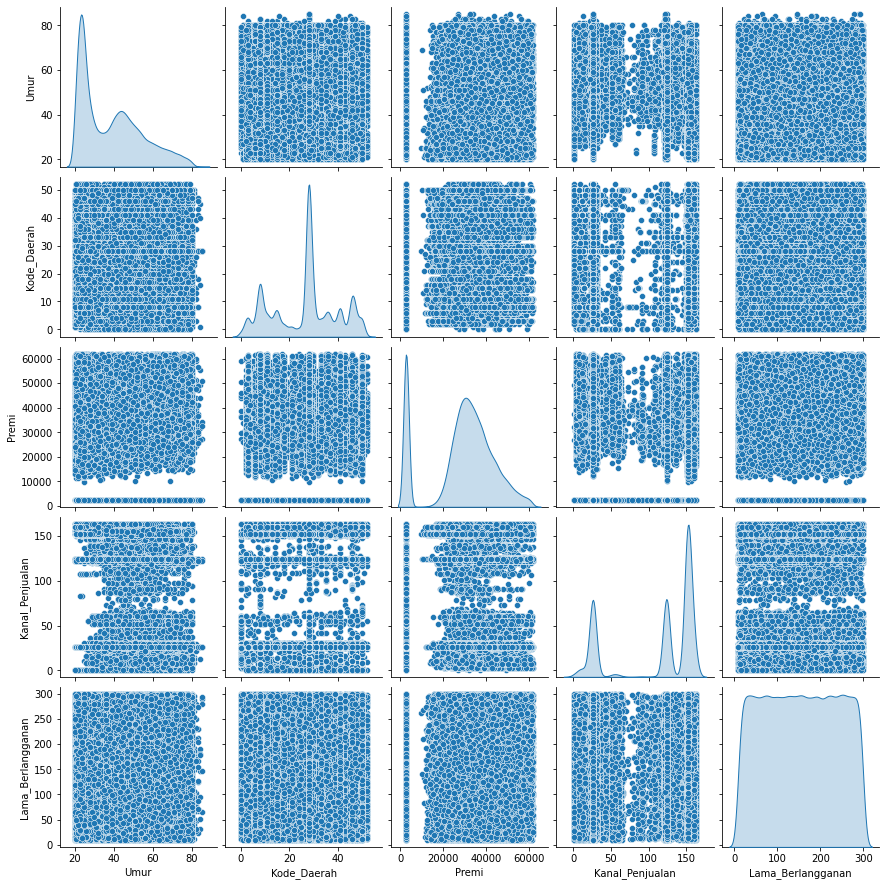

In [20]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

melihat visualisai nilai korelasi antar fitur

Text(0.5, 1.0, 'Correlation Matrix')

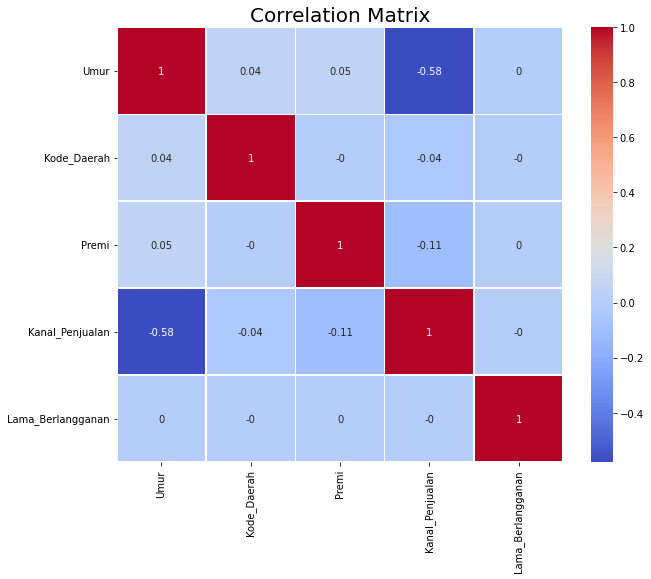

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

berdasarkan visualisasi diatas, atribut yang memiliki nilai korelasi paling besar adalah antara umur dan Kanal_Penjualan

In [22]:
data.drop(['Kode_Daerah','Premi','Lama_Berlangganan'], axis=1, inplace=True)
data.head()

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0


Mengubah data menjadi numpy array

In [23]:
data.to_numpy()

array([[ 30., 152.],
       [ 48.,  29.],
       [ 21., 160.],
       ...,
       [ 23., 152.],
       [ 68., 124.],
       [ 45.,  26.]])

memanggil MinMaxScaler dari library sklearn, standarisasi adalah teknik yang digunakan untuk memusatkan kolom fitur pada mean 0 dengan standar deviasi 1 sehingga kolom fitur memiliki parameter yang sama dengan distribusi normal standar

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)

membuat class K_Means dengan parameter input k(banyaknya klasifikasi)

In [25]:
#colors digunakan untuk memberikan warna pada visualisasi
colors = ["g","r","b","k"]
class K_Means:
  def __init__(self,k):
    self.k = k
    # self.tol merupakan nilai toleransi yang sesuai dengan library sk.learn
    self.tol = 0.0001
    # self.iter merupakan banyaknya iterasi yang akan dilakukan sesuai dengan library sk.learn
    self.max_iter = 300
    # self.sse merupakan nilai sum square error dari hasil clustering
    self.sse = 0
  def fit(self, data):
    #self.centroids digunakan untuk menyimpan nilai centroids
    self.centroids = {}
    #mengacak sample data agar mendapat centroid baru
    np.random.shuffle(data)
    for i in range(self.k):
      #mengisi centroid sebanyak nilai self.k
      self.centroids[i] = data[i]
    for i in range(self.max_iter):
      #self.classifications digunakan untuk menyimpan hasil clustering
      self.classifications = {}
      #self.current_distances digunakan untuk menyimpan jarak dengan centroid
      self.current_distances = []
      for i in range(self.k):
        #membuat array sebanyak self.k
        self.classifications[i] = []
      for featureset in data:
        #distances untuk menghitung jarak data dengan centroid
        distances = [np.linalg.norm(featureset-self.centroids[centroid])for centroid in self.centroids]
        #mengambil index jarak terpendek dari array distances
        classification = distances.index(min(distances))
        #masukan kedalam array self.current_distances
        self.current_distances.append(distances[classification])
        #masukan data ke dalan self.classification
        self.classifications[classification].append(featureset)
      #prev_centorids untuk menampung nilai centroid yang lama
      prev_centroids = dict(self.centroids)
      for classification in self.classifications:
        #menghitung rata rata data untuk mendapatkan centroid baru
        self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
      optimized = True
      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        #jika perubahan centroid baru dengan centroid lama melebihi self.tol maka hasil clustering belum optimal
        if np.sum(((current_centroid-original_centroid))/original_centroid*100.0)>self.tol:
          optimized = False
      #jika data hasil clustering sudah optimal hitung sse dan keluar dari looping
      if optimized:
        for se in self.current_distances:
          self.sse = self.sse + (se**2)
        break



menghitung nilai k_mens dari k=1 sampai k=10

In [26]:
#sse untuk menampung nilai sse dari k = 1 sampai k = 10
sse = []
for i in range(1,11):
    clf=K_Means(i)
    clf.fit(data)
    sse.append(clf.sse)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


menampilan visualisasi Sum Squared Error dari k=1 sampai k=10

Text(0, 0.5, 'Inertia')

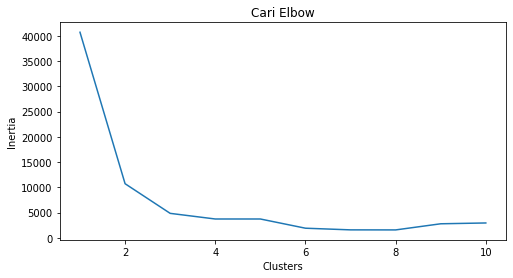

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=sse, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

berdasarkan elbow method, nilai k yang optimal adalah 2, karena mempunyai sudut paling kecil diantara yg lainnya

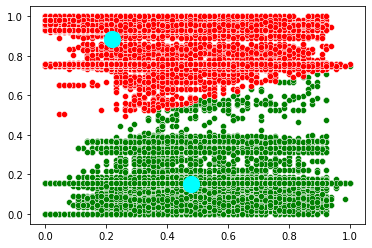

In [28]:
clf = K_Means(2)
clf.fit(data)
#k1 untuk menampung data cluster pertama
k1 = np.reshape(clf.classifications[0], (-1))
#k2 untuk menampung data cluster kedua
k2 = np.reshape(clf.classifications[1], (-1))
#x1 untuk menampung umur dari k1
x1 = []
#y1 untuk menampung kanal_penjualan dari k1
y1 = []
for i in range(len(k1)):
  if (i%2)==0:
    x1.append(k1[i])
  else:
    y1.append(k1[i])
#x2 untuk menampung umur dari k2
x2 = []
#y2 untuk menampung kanal_penjualan daru k2
y2 = []
for i in range(len(k2)):
  if (i%2)==0:
    x2.append(k2[i])
  else:
    y2.append(k2[i])
#tentukan warna
sns.scatterplot(x=x1,y=y1,color=colors[0])
sns.scatterplot(x=x2,y=y2,color=colors[1])
#beri tanda untuk centroid
for centroid in clf.centroids:
  plt.scatter(x=clf.centroids[centroid][0], y=clf.centroids[centroid][1],
              marker="o", color="cyan", s=150, linewidths=5)

plt.show()
